In [7]:
%matplotlib inline
import sys
import outliers
import pandas as pd
import matplotlib.pyplot as plt
from outliers import ddc_outlier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score
import numpy as np

import warnings
warnings.filterwarnings('ignore')

prescription = pd.read_csv('../data/prescriptions2017_clean.csv.gz', compression='gzip')

In [8]:
medications = outliers.getOverdoseMedications(prescription)
medications.shape

(73,)

In [9]:
ep_range = np.arange(0.01,1.0,0.01)
results, max_f = outliers.runParameterSearch(prescription, np.asarray(medications), ep_range)

ACICLOVIR 200 mg CP, 2359, 52, 19, 138.441500636, 178.699232559, 103.0, 3.0, 103.0, 200.0, 273.590504451, 165.334822112, 200.0, 200.0, 200.0, 200.0, 3.29249682069, 0.849451159049, 3.0, 3.0, 3.0, 3.0, (IsoF+0.03), 0.611764705882, , (Cov+0.01), 0.0, , (DDC+0.95), 0.310447761194, , (DDC-C+0.53), 0.488262910798, , (DDC-J+0.42), 0.310447761194, 
ALBENDAZOL 400 mg CP, 2660, 53, 5, 207.618609023, 212.893988214, 201.0, 1.0, 201.0, 400.0, 414.060150376, 73.5617749092, 400.0, 400.0, 400.0, 400.0, 1.17706766917, 0.381725961531, 1.0, 1.0, 1.0, 1.0, (IsoF+0.02), 0.72602739726, , (Cov+0.01), 0.0, , (DDC+0.91), 0.721088435374, , (DDC-C+0.44), 1.0, , (DDC-J+0.1), 0.721088435374, 
ALOPURINOL 100 mg CP, 4729, 12, 12, 79.5297631635, 99.9432659805, 53.0, 1.0, 53.0, 100.0, 157.676041446, 88.1080476458, 100.0, 100.0, 100.0, 300.0, 1.38348488052, 0.776627843697, 1.0, 1.0, 1.0, 1.0, (IsoF+0.01), 0.154838709677, , (Cov+0.17), 0.888888888889, , (DDC+0.91), 0.292682926829, , (DDC-C+0.48), 0.533333333333, , (DDC-

HIDRALAZINA 50 mg CP, 6056, 214, 15, 30.2736129458, 30.1707892341, 15.5, 3.0, 15.5, 50.0, 57.3976221929, 18.6762045185, 50.0, 50.0, 50.0, 50.0, 3.14960369881, 0.5733023081, 3.0, 3.0, 3.0, 3.0, (IsoF+0.05), 0.63976083707, , (Cov+0.1), 0.934497816594, , (DDC+0.95), 0.632200886263, , (DDC-C+0.58), 0.741020793951, , (DDC-J+0.49), 0.632200886263, 
HIDROCLOROTIAZIDA 50 mg CP, 1084, 63, 10, 28.809501845, 37.8130861655, 14.0, 1.0, 14.0, 50.0, 56.4114391144, 36.5477559767, 50.0, 50.0, 50.0, 50.0, 1.20756457565, 0.431997388864, 1.0, 1.0, 1.0, 1.0, (IsoF+0.05), 0.887323943662, , (Cov+0.01), 0.0, , (DDC+0.95), 0.663157894737, , (DDC-C+0.56), 0.806201550388, , (DDC-J+0.43), 0.887323943662, 
HIDROXIDO DE MAGNESIO 8 % SUSP ORAL, 1777, 299, 21, 11.9231851435, 11.6600461772, 5.0, 3.0, 5.0, 20.0, 21.4462577378, 9.48247554678, 20.0, 15.0, 20.0, 30.0, 2.40011254924, 0.786249289071, 3.0, 2.0, 3.0, 3.0, (IsoF+0.3), 0.553191489362, , (Cov+0.35), 0.652126499455, , (DDC+0.92), 0.206549118388, , (DDC-C+0.99), 0

VARFARINA 5 mg CP, 6419, 127, 12, 3.3373890014, 3.20876265196, 1.25, 1.0, 1.25, 5.0, 5.67508957782, 3.10845168096, 5.0, 5.0, 5.0, 5.0, 0.999688424988, 0.0124775969984, 1.0, 1.0, 1.0, 1.0, (IsoF+0.01), 0.923728813559, , (Cov+0.02), 1.0, , (DDC+0.93), 0.933823529412, , (DDC-C+0.69), 0.368055555556, , (DDC-J+0.17), 0.933823529412, 
VITAMINAS DO COMPLEXO B CP, 5766, 185, 6, 1.73508498092, 0.889473093682, 1.0, 1.0, 1.0, 3.0, 1.06156781131, 0.24036891629, 1.0, 1.0, 1.0, 1.0, 2.40860215054, 0.785682376866, 3.0, 2.0, 3.0, 3.0, (IsoF+0.02), 1.0, , (Cov+0.08), 0.685185185185, , (DDC+0.94), 0.685185185185, , (DDC-C+0.57), 1.0, , (DDC-J+0.1), 1.0, 


In [10]:
display(results)

,Time,Accuracy,Recall,Precision,F-Measure
IsoF,0.720875,0.938017,0.935847,0.484883,0.562730
Cov,0.624854,0.748907,0.678278,0.438530,0.496159
DDC,0.047875,0.962823,0.902825,0.415118,0.518578
DDC-C,0.082292,0.933639,0.718269,0.469763,0.467049
DDC-J,0.037750,0.968505,0.920587,0.552779,0.648855


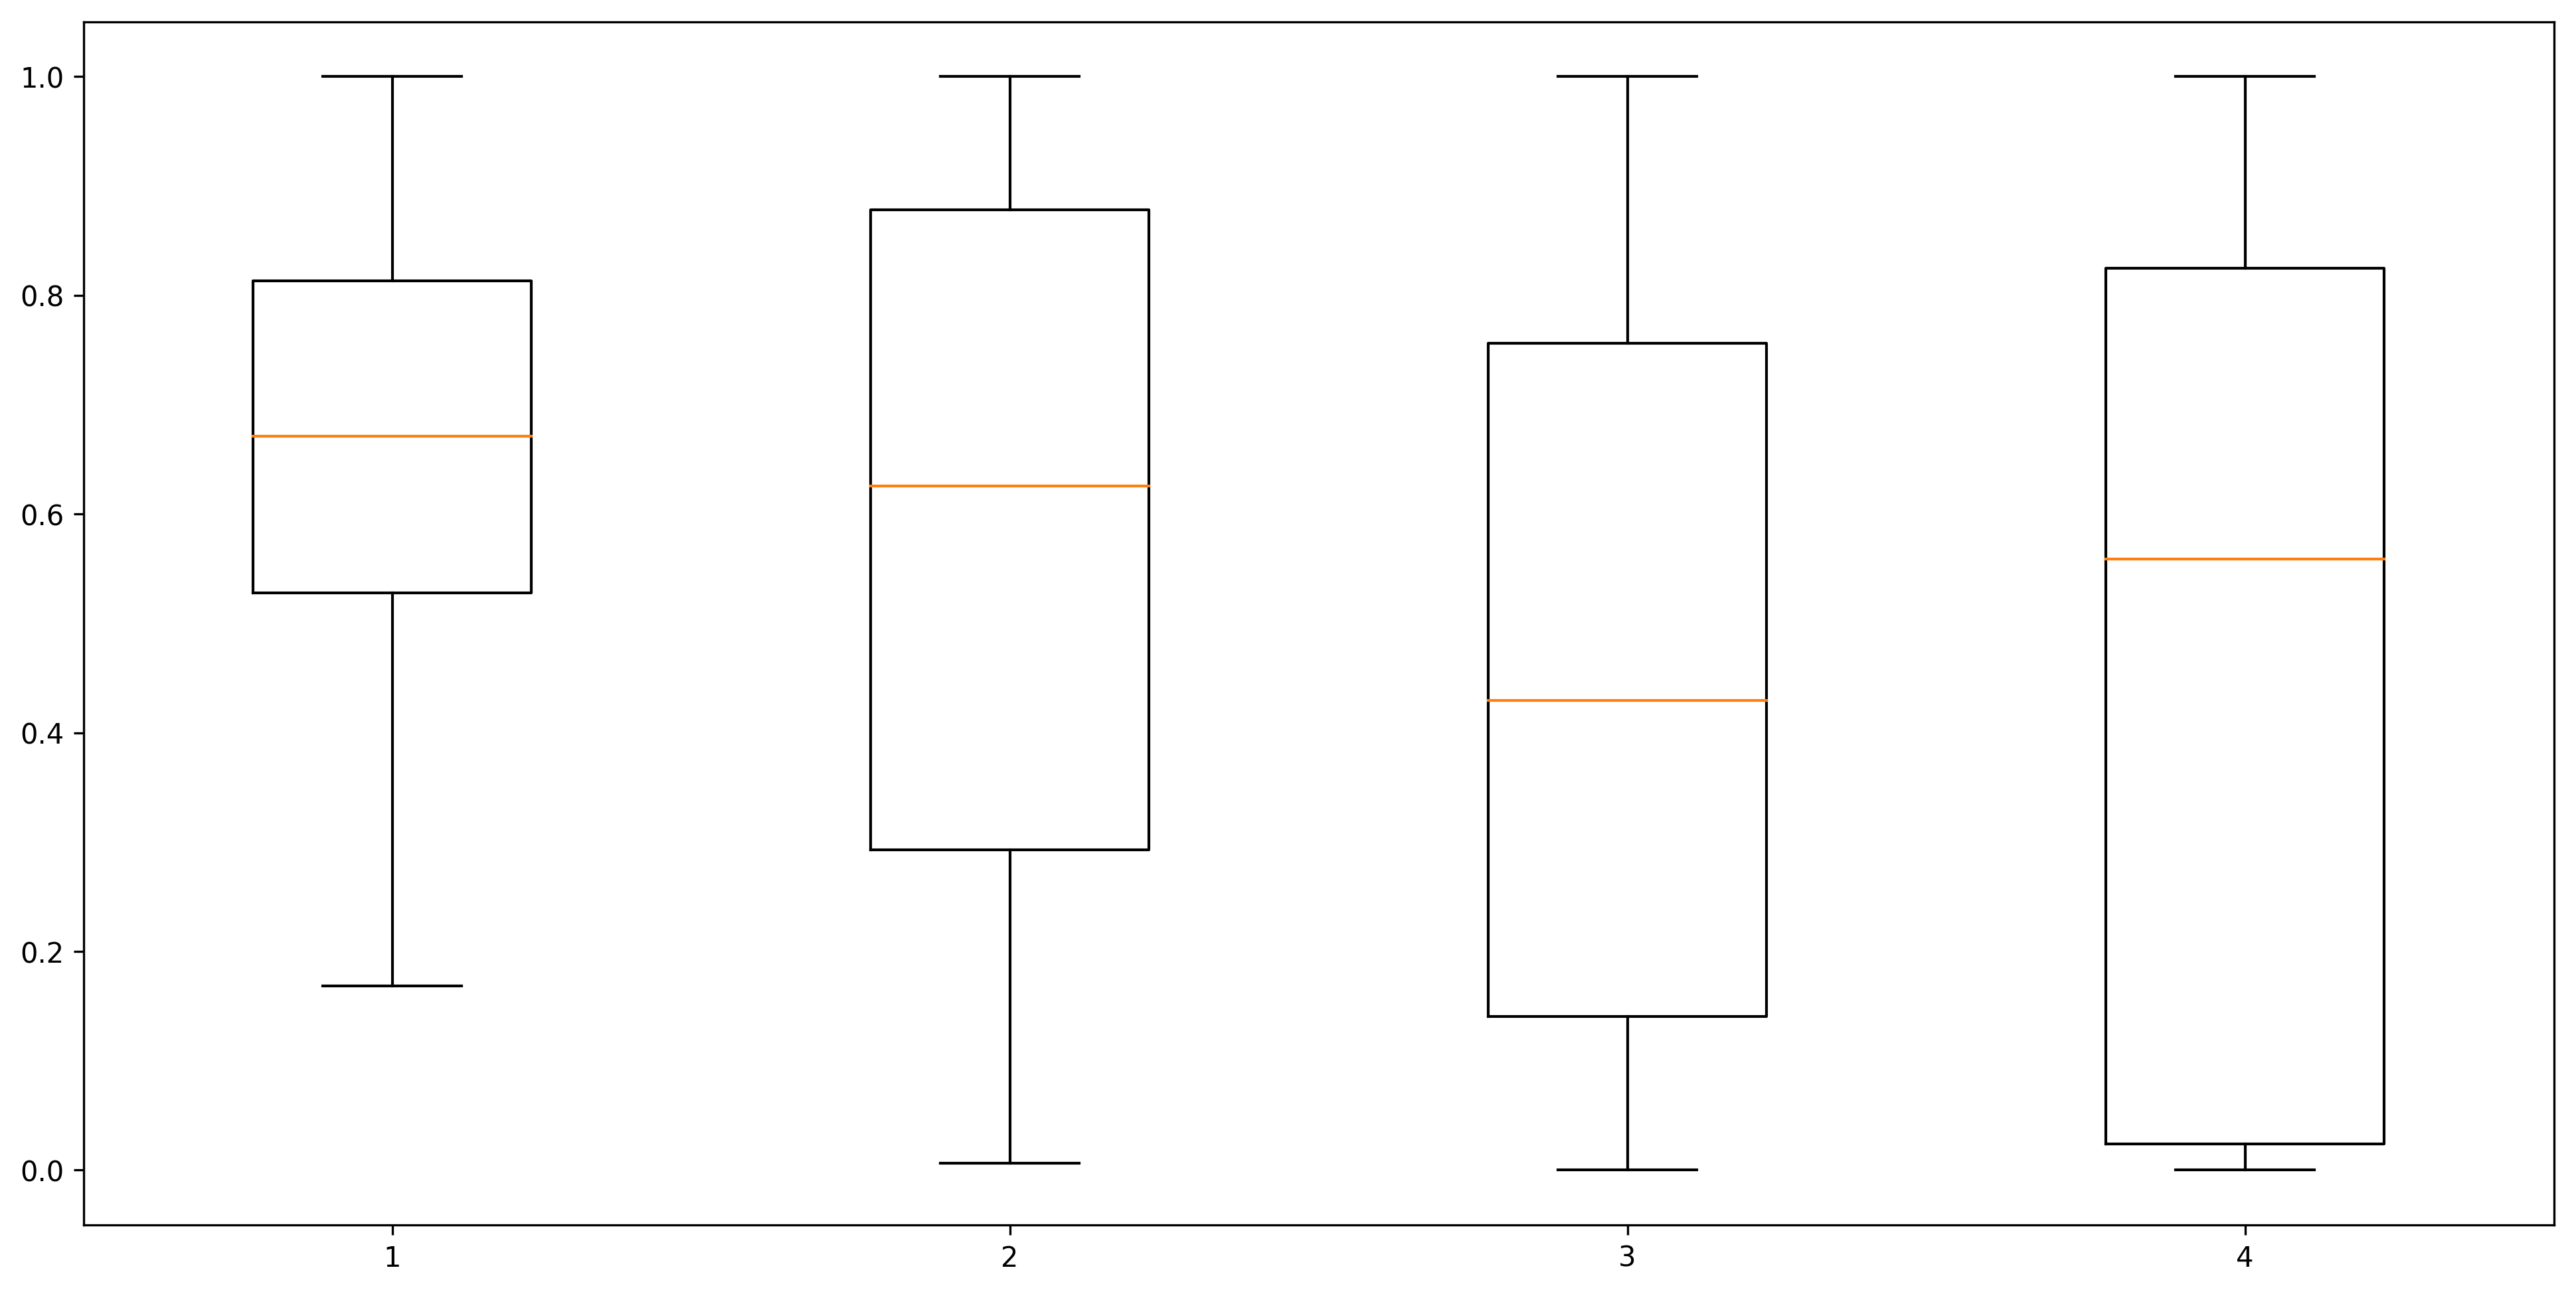

In [14]:
%matplotlib inline
plt.figure(figsize=(16, 8), dpi= 300)

data = []

data.append(max_f.loc['DDC-J'].values)
data.append(max_f.loc['IsoF'].values)
data.append(max_f.loc['DDC-C'].values)
data.append(max_f.loc['Cov'].values)    
    
plt.boxplot(data)

plt.show()